### Analysis on New Moon Prediction
* Compare the predictions of this project with the data collected from https://www.taipeidaniel.idv.tw/articles-astrology-moon-new-full.htm
* This notebook also works as an integration test of C++ project `Celestial-Calendar`

In [1]:
import sys

# Add parent directory to path
sys.path.append("..")

import common
import pprint

In [2]:
results_2024 = common.new_moons_in_year(2024)
pprint.pprint(results_2024)

NewMoons(year=2024,
         new_moon_jdes=[2460320.9990333035,
                        2460350.4585794513,
                        2460379.8760842243,
                        2460409.2653313978,
                        2460438.641093933,
                        2460468.0269966265,
                        2460497.457322279,
                        2460526.968203095,
                        2460556.580986239,
                        2460586.2849843567,
                        2460616.0335931526,
                        2460645.765686331,
                        2460675.436055392],
         new_moon_moments=[datetime.datetime(2024, 1, 11, 11, 57, 27, 370795),
                           datetime.datetime(2024, 2, 9, 22, 59, 12, 166358),
                           datetime.datetime(2024, 3, 10, 9, 0, 24, 586730),
                           datetime.datetime(2024, 4, 8, 18, 20, 55, 550068),
                           datetime.datetime(2024, 5, 8, 3, 22, 1, 440211),
                         

In [3]:
import csv
from dataclasses import dataclass
from datetime import datetime, timedelta

'''
Head lines of file moon_phases.csv:
日期,時間,狀態
2008年01月08日,07:35pm,新月
2008年01月22日,09:35pm,滿月
2008年02月07日,11:40am,新月
2008年02月21日,11:34am,滿月
2008年03月08日,01:13am,新月
2008年03月22日,02:41am,滿月
'''

@dataclass
class MoonPhase:
  moment: datetime
  new_moon: bool

# Read the csv file create a list of `MoonPhase`s
moon_phases = []
with open(common.NEW_MOON_CSV_PATH, newline='', encoding='utf-8') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
    moment = row['日期'] + ' ' + row['時間']
    moment = datetime.strptime(moment, '%Y年%m月%d日 %I:%M%p')

    # Moment is timezone UT1+8. Make it back to UT1.
    moment -= timedelta(hours=8)

    new_moon = row['狀態'] == '新月'

    moon_phases.append(MoonPhase(moment, new_moon))

In [4]:
from typing import List
from itertools import chain

# Use data points in `moon_phases.csv` as actual values
actual = [mp.moment for mp in moon_phases if mp.new_moon]

all_years = sorted(set([m.year for m in actual]))

def get_preds(year) -> List[datetime]:
  results = common.new_moons_in_year(year)
  return results.new_moon_moments

pred = list(chain.from_iterable(map(get_preds, all_years)))

In [5]:
# Ensure they have the same length
print(len(actual), len(pred))
assert len(actual) == len(pred)

272 272


In [6]:
print(actual[:3])
print(pred[:3])

[datetime.datetime(2008, 1, 8, 11, 35), datetime.datetime(2008, 2, 7, 3, 40), datetime.datetime(2008, 3, 7, 17, 13)]
[datetime.datetime(2008, 1, 8, 11, 37, 1, 504504), datetime.datetime(2008, 2, 7, 3, 44, 25, 535808), datetime.datetime(2008, 3, 7, 17, 14, 13, 964039)]


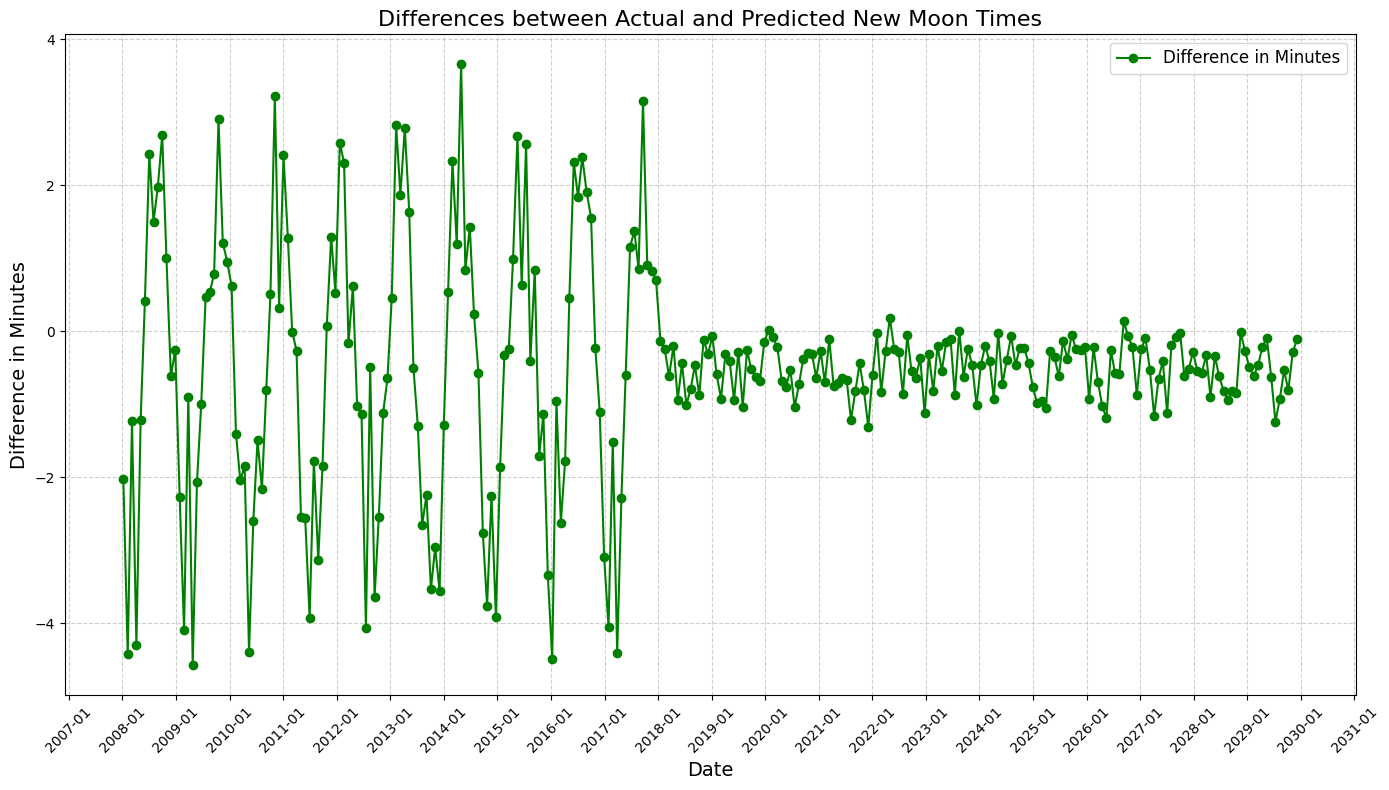

First few differences (in minutes): [-2.02507507 -4.4255968  -1.23273398 -4.3007765  -1.20954888  0.41260855
  2.4227845   1.50054531  1.9790197   2.6824772 ]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert datetime objects to timestamps
actual_timestamps = np.array([dt.timestamp() for dt in actual])
pred_timestamps = np.array([dt.timestamp() for dt in pred])

# Calculate the differences in seconds
differences = actual_timestamps - pred_timestamps

# Convert differences to minutes
differences_in_minutes = differences / 60

# Extract the date part from the actual datetime objects for the x-axis
dates = [dt.date() for dt in actual]

# Create the plot
plt.figure(figsize=(14, 8))
plt.plot(dates, differences_in_minutes, marker='o', linestyle='-', color='g', label='Difference in Minutes')

# Set plot title and labels
plt.title('Differences between Actual and Predicted New Moon Times', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Difference in Minutes', fontsize=14)

# Improve the x-axis with date formatting and rotation
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Add a grid with subtle color
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the first few differences for inspection
print("First few differences (in minutes):", differences_in_minutes[:10])